## graphml2heatmap.ipynb

This notebook transforms a graphml file (of the type produced by https://github.com/SuLab/genewikiworld) and creates a heatmap visualization

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
G = nx.read_graphml('../data/wikidata-update-2021-09-06.graphml')
G

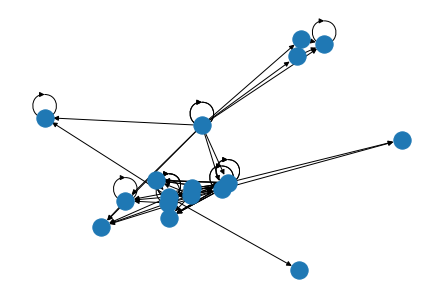

In [3]:
nx.draw(G)

In [18]:
# inspect nodes
for node in G.nodes(data=True):
    print(node)
    print(node[1]['count'])


('n0', {'node_type': 'detail', 'node_prop_text': 'MonDO ID: 7,884\nUMLS CUI: 7,533\nOrphanet ID: 5,943\nICD-10-CM: 5,025\nOMIM ID: 4,963\nDisease Ontology ID: 4,808\nMeSH descriptor ID: 4,471\nGARD rare disease ID: 3,042\nFreebase ID: 2,108\nMeSH tree code: 2,060\nDiseasesDB: 1,527\nICD-10: 1,442\nICD-9: 1,120\neMedicine ID: 1,014\nEncyclopædia Britannica Online ID: 869\nJSTOR topic ID: 867\nMedlinePlus ID: 680\nHuman Phenotype Ontology ID: 616\nQuora topic ID: 579', 'labelcount': 'disease\n13,043', 'NodeLabel': 'disease', 'label': 'disease\n13,043', 'URL': 'https://www.wikidata.org/wiki/Q12136', 'P3417': 579, 'P3841': 616, 'P1417': 869, 'P604': 680, 'P493': 1120, 'P673': 1014, 'P3827': 867, 'P494': 1442, 'P557': 1527, 'P646': 2108, 'P4317': 3042, 'P672': 2060, 'P492': 4963, 'P1550': 5943, 'P486': 4471, 'P4229': 5025, 'P699': 4808, 'P2892': 7533, 'P5270': 7884, 'count': 13043, 'shape_type': 'ShinyPlateNodeWithShadow', 'x': '23.260645947606577', 'y': '1510.9335890755037'})
13043
('n1', 

In [5]:
# inspect edges 

for edge in G.edges(data=True):
    print(edge)


('n0', 'n0', {'labelcount': 'subclass of (17,666)', 'URL': 'https://www.wikidata.org/wiki/Property:P279', 'pid': 'P279', 'label': 'subclass of (17,666)', 'count': 17666})
('n0', 'n0', {'labelcount': 'instance of (742)', 'URL': 'https://www.wikidata.org/wiki/Property:P31', 'pid': 'P31', 'label': 'instance of (742)', 'count': 742})
('n0', 'n0', {'labelcount': 'symptoms (606)', 'URL': 'https://www.wikidata.org/wiki/Property:P780', 'pid': 'P780', 'label': 'symptoms (606)', 'count': 606})
('n0', 'n3', {'labelcount': 'drug used for treatment /\nmedical condition treated (3,057)', 'URL': 'https://www.wikidata.org/wiki/Property:P2176', 'pid': 'P2176', 'label': 'drug used for treatment /\nmedical condition treated (3,057)', 'count': 3057})
('n0', 'n4', {'labelcount': 'drug used for treatment /\nmedical condition treated (4,814)', 'URL': 'https://www.wikidata.org/wiki/Property:P2176', 'pid': 'P2176', 'label': 'drug used for treatment /\nmedical condition treated (4,814)', 'count': 4814})
('n0', 

In [23]:
# transform graph data into data frame

numOfRows=10
data = []

for edge in G.edges(data=True):
    data.append([G.nodes[edge[0]]['NodeLabel'],G.nodes[edge[1]]['NodeLabel'],edge[2]['count']])

for node in G.nodes(data=True):
    data.append([node[1]['NodeLabel'],"COUNT",node[1]['count']])


df = pd.DataFrame(data,columns=["Node1","Node2","count"])
df


,Node1,Node2,count
0,disease,disease,17666
1,disease,disease,742
2,disease,disease,606
3,disease,chemical compound,3057
4,disease,medication,4814
...,...,...,...
75,biological pathway,COUNT,3478
76,pharmacologic action,COUNT,2245
77,therapeutic use,COUNT,1232
78,mechanism of action,COUNT,119


In [24]:
df[df.Node1=="gene"]

,Node1,Node2,count
9,gene,taxon,836384
10,gene,gene,3229870
64,gene,COUNT,1196360


In [25]:
# get full list of unique node types

nodes = np.sort(pd.unique(df[['Node1', 'Node2']].values.ravel()))
nodes

array(['COUNT', 'active site', 'anatomical structure', 'binding site',
       'biological pathway', 'chemical compound', 'disease', 'gene',
       'mechanism of action', 'medication', 'pharmaceutical product',
       'pharmacologic action', 'protein', 'protein family',
       'sequence variant', 'symptom', 'taxon', 'therapeutic use'],
      dtype=object)

In [26]:
# create output dataframe with edge counts

df2 = pd.DataFrame(0,nodes,nodes)
df2

,COUNT,active site,anatomical structure,binding site,biological pathway,chemical compound,disease,gene,mechanism of action,medication,pharmaceutical product,pharmacologic action,protein,protein family,sequence variant,symptom,taxon,therapeutic use
COUNT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
active site,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
anatomical structure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
binding site,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
biological pathway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chemical compound,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
disease,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gene,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mechanism of action,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
medication,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# populate output data frame df2 (combine edges of with different predicates, in opposite directions)

for i,j in df.iterrows():
    if( j['Node1'] > j['Node2'] ):
        df2.at[j['Node1'],j['Node2']] = df2.at[j['Node1'],j['Node2']] + j['count']
    else:
        df2.at[j['Node2'],j['Node1']] = df2.at[j['Node2'],j['Node1']] + j['count']

# remove negative values (from when SPARQL query times out, count is set to -1)
df2[df2 < 0] = 0

df2

,COUNT,active site,anatomical structure,binding site,biological pathway,chemical compound,disease,gene,mechanism of action,medication,pharmaceutical product,pharmacologic action,protein,protein family,sequence variant,symptom,taxon,therapeutic use
COUNT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
active site,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
anatomical structure,30684,0,726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
binding site,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
biological pathway,3478,0,0,0,3230,0,0,0,0,0,0,0,0,0,0,0,0,0
chemical compound,1223312,0,0,0,4434,3329,0,0,0,0,0,0,0,0,0,0,0,0
disease,13043,0,339,0,0,3057,19014,0,0,0,0,0,0,0,0,0,0,0
gene,1196360,0,0,0,34369,0,9031,3229870,0,0,0,0,0,0,0,0,0,0
mechanism of action,119,0,0,0,0,868,0,0,0,0,0,0,0,0,0,0,0,0
medication,4909,0,0,0,1335,2714,4814,0,566,4115,0,0,0,0,0,0,0,0


In [28]:
def pretty_round(a, digits=0):
    if( str(type(a)) == "<class 'pandas.core.series.Series'>" ):
#        print("A")
        out = []
        for i in a:
#            print("B: "+str(i))
            out.append(pretty_round(i))
        return(out)
    if(not isinstance(a,int)):
        return None
    i=0
    while(int(a)>=1e3):
       a/=1e3
       i+=1
    return str(int(round(a,digits)))+" kMBT"[i]

In [29]:
df2Label = df2.apply(pretty_round)
df2Label

,COUNT,active site,anatomical structure,binding site,biological pathway,chemical compound,disease,gene,mechanism of action,medication,pharmaceutical product,pharmacologic action,protein,protein family,sequence variant,symptom,taxon,therapeutic use
COUNT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
active site,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
anatomical structure,31k,0,726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
binding site,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
biological pathway,3k,0,0,0,3k,0,0,0,0,0,0,0,0,0,0,0,0,0
chemical compound,1M,0,0,0,4k,3k,0,0,0,0,0,0,0,0,0,0,0,0
disease,13k,0,339,0,0,3k,19k,0,0,0,0,0,0,0,0,0,0,0
gene,1M,0,0,0,34k,0,9k,3M,0,0,0,0,0,0,0,0,0,0
mechanism of action,119,0,0,0,0,868,0,0,0,0,0,0,0,0,0,0,0,0
medication,5k,0,0,0,1k,3k,5k,0,566,4k,0,0,0,0,0,0,0,0


In [30]:
# perform log10 transformation

df3 = np.log10(df2 + 1)
df3

,COUNT,active site,anatomical structure,binding site,biological pathway,chemical compound,disease,gene,mechanism of action,medication,pharmaceutical product,pharmacologic action,protein,protein family,sequence variant,symptom,taxon,therapeutic use
COUNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
active site,2.123852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
anatomical structure,4.486926,0.000000,2.861534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
binding site,1.897627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
biological pathway,3.541454,0.000000,0.000000,0.000000,3.509337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
chemical compound,6.087538,0.000000,0.000000,0.000000,3.646894,3.522444,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
disease,4.115411,0.000000,2.531479,0.000000,0.000000,3.485437,4.279096,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
gene,6.077862,0.000000,0.000000,0.000000,4.536180,0.000000,3.955784,6.509185,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
mechanism of action,2.079181,0.000000,0.000000,0.000000,0.000000,2.939020,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
medication,3.691081,0.000000,0.000000,0.000000,3.125806,3.433770,3.682596,0.000000,2.753583,3.614475,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [43]:
df4 = df3
df4[df4==0] = None
df4

,COUNT,active site,anatomical structure,binding site,biological pathway,chemical compound,disease,gene,mechanism of action,medication,pharmaceutical product,pharmacologic action,protein,protein family,sequence variant,symptom,taxon,therapeutic use
COUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active site,2.123852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anatomical structure,4.486926,NaN,2.861534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
binding site,1.897627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
biological pathway,3.541454,NaN,NaN,NaN,3.509337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chemical compound,6.087538,NaN,NaN,NaN,3.646894,3.522444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disease,4.115411,NaN,2.531479,NaN,NaN,3.485437,4.279096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene,6.077862,NaN,NaN,NaN,4.536180,NaN,3.955784,6.509185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mechanism of action,2.079181,NaN,NaN,NaN,NaN,2.939020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medication,3.691081,NaN,NaN,NaN,3.125806,3.433770,3.682596,NaN,2.753583,3.614475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

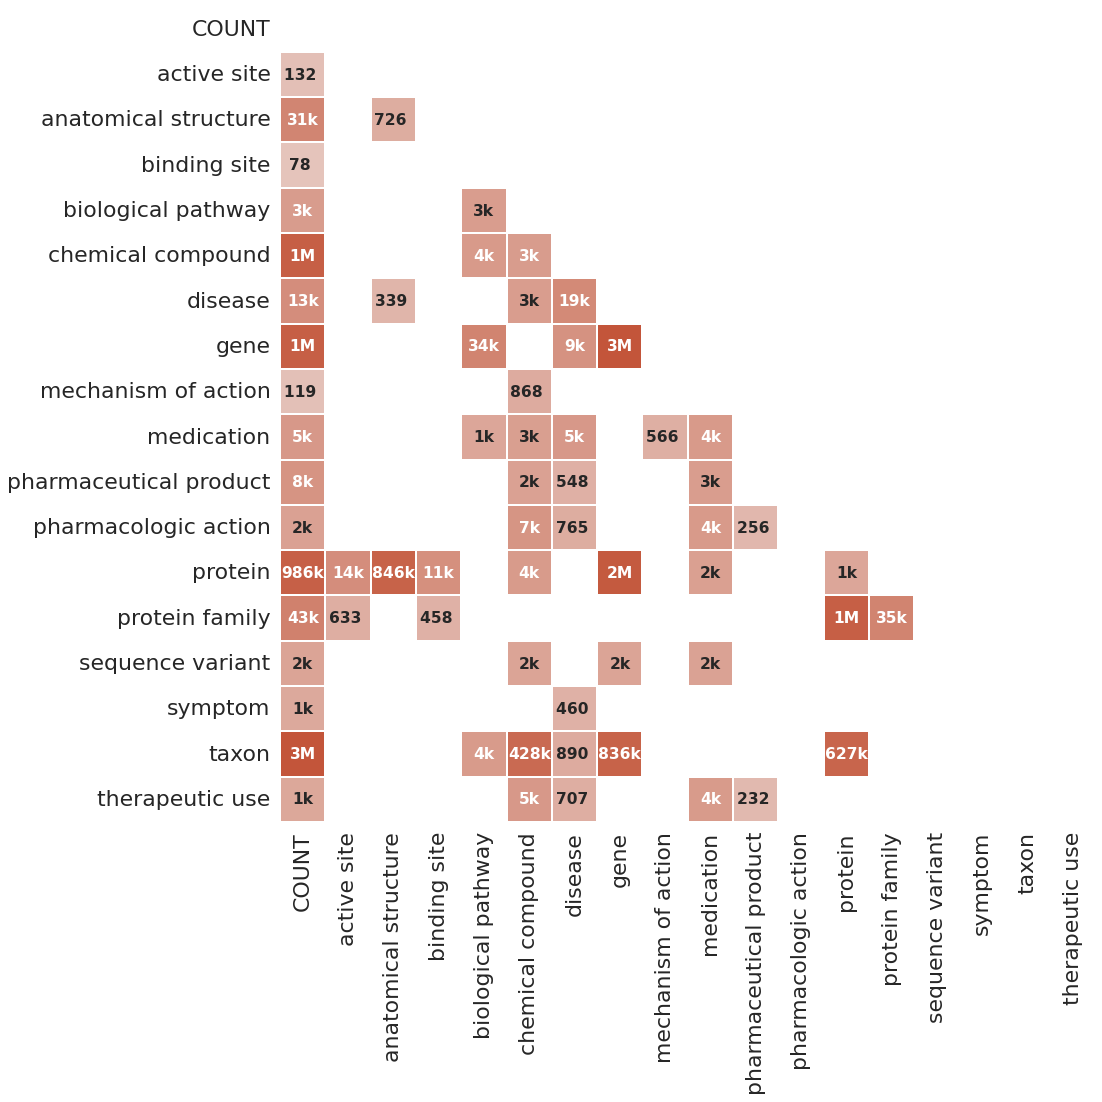

In [103]:
# create plot

sns.set_theme(style="white", font_scale=2)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.zeros_like(df3)
mask[np.triu_indices_from(mask,k=1)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df4, 
            cmap=cmap, 
#            vmax=100, 
            mask=mask,
            annot=df2Label,
            annot_kws={"size": 15.5,"fontweight":"bold"},
            fmt="",
            center=0,
            square=True, 
            linewidths=2,
            linecolor="white",
            cbar=False,
        )

<AxesSubplot:>

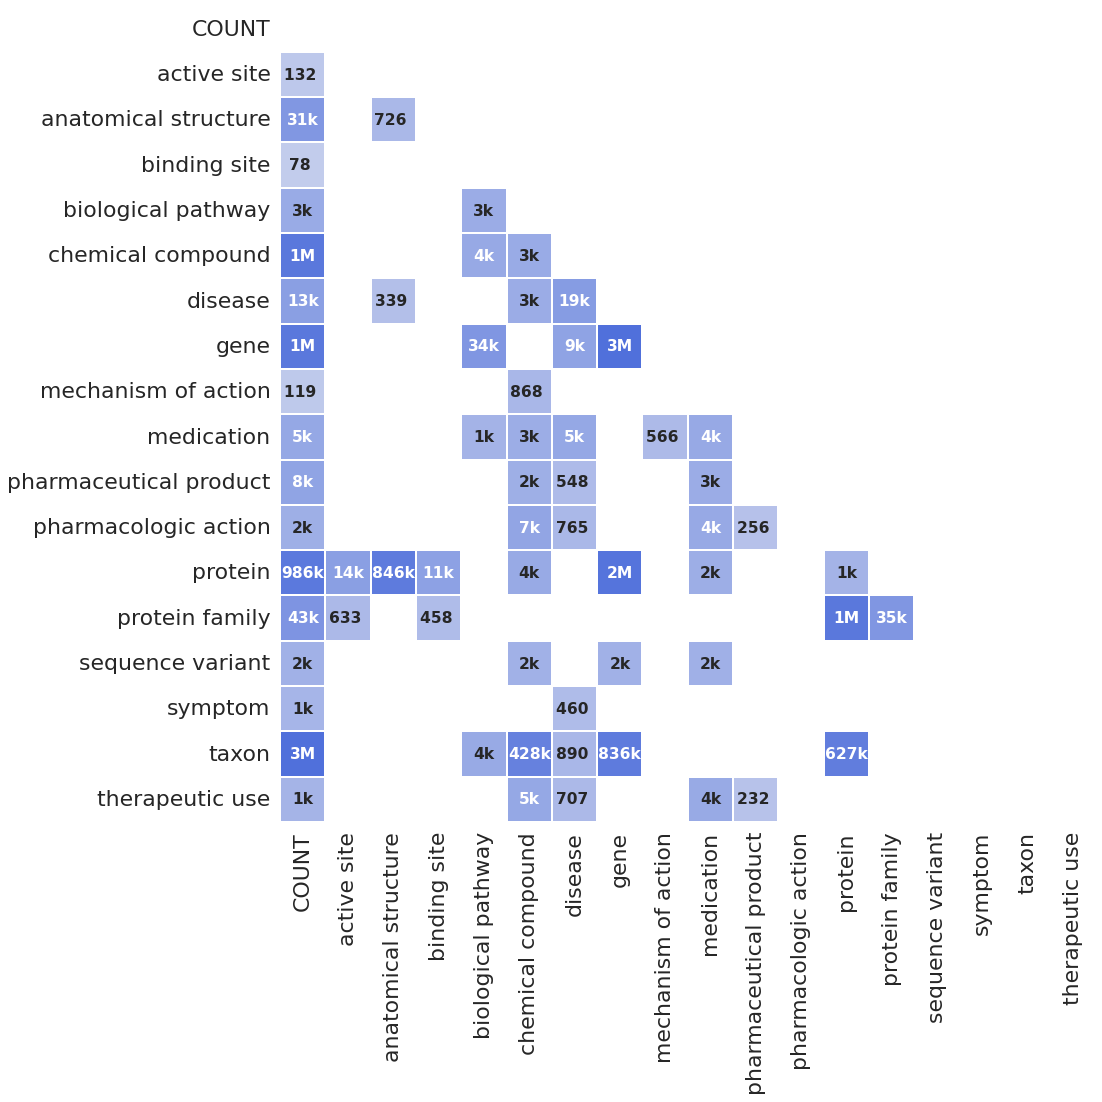

In [104]:
# create plot

sns.set_theme(style="white", font_scale=2)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 260, as_cmap=True)

mask = np.zeros_like(df3)
mask[np.triu_indices_from(mask,k=1)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df4, 
            cmap=cmap, 
#            vmax=100, 
            mask=mask,
            annot=df2Label,
            annot_kws={"size": 15.5,"fontweight":"bold"},
            fmt="",
            center=0,
            square=True, 
            linewidths=2,
            linecolor="white",
            cbar=False,
        )